# Preprocessing with Python

# Outline
* Import Dataset
* Explore Data
* Missing Data
* Imputation

## Import Library

In [1]:
import pandas as pd
import numpy as np

# Import Dataset

Pandas memiliki function yang disiapkan untuk mengimport berbagai jenis file.

Untuk `csv` dan `txt` digunakan `read_csv`

## CSV File

Data yang tersedia berada di dalam folder `data`

Karena data yang kita gunakan merupakan tipe file `csv`, maka kita gunakan `read_csv`.

Pandas mengasumsikan bahwa setiap bagian terpisah dengan notasi ",". Tetapi dataset yang kita gunakan memiliki bagian-bagian yang terpisah dengan ";".


In [2]:
# membuka dokumentasi fungsi read_csv
# pd.read_csv

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/ade-irawan/dummy-datasets/main/hr_data.csv")

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,;satisfaction_level;last_evaluation;number_project;average_montly_hours;time_spend_company;Work_accident;left;promotion_last_5years;division;salary
0,0;;0.53;2;157;3;0;1;0;sales;
1,1;0.8;0.86;5;262;6;0;1;0;sales;medium
2,2;0.11;;7;272;4;0;1;0;;medium
3,3;0.72;0.87;5;223;5;0;1;0;sales;low
4,4;0.37;0.52;2;159;3;0;1;0;sales;low


Hasil nya sangat susah untuk dibaca. Bagaimana mengatasinya?

`read_csv` memiliki parameter bernama `sep` yang digunakan untuk menentukan notasi pemisah. Agar data yang kita miliki lebih mudah untuk dibaca, `sep` akan sama dengan `";"`.

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/ade-irawan/dummy-datasets/main/hr_data.csv", sep=";")

In [7]:
data.head()

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,division,salary
0,0,NaN,0.53,2,157,3,0,1,0,sales,NaN
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,NaN,7,272,4,0,1,0,NaN,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/ade-irawan/dummy-datasets/main/hr_data.csv", sep=";", index_col=0)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,division,salary
0,NaN,0.53,2,157,3,0,1,0,sales,NaN
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,NaN,7,272,4,0,1,0,NaN,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
data.head().T

,0,1,2,3,4
satisfaction_level,NaN,0.8,0.11,0.72,0.37
last_evaluation,0.53,0.86,NaN,0.87,0.52
number_project,2,5,7,5,2
average_montly_hours,157,262,272,223,159
time_spend_company,3,6,4,5,3
Work_accident,0,0,0,0,0
left,1,1,1,1,1
promotion_last_5years,0,0,0,0,0
division,sales,sales,NaN,sales,sales
salary,NaN,medium,medium,low,low


In [10]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14771.000000,14871.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.615329,0.716159,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.247609,0.170957,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.650000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14771.0,0.615329,0.247609,0.09,0.44,0.65,0.82,1.0
last_evaluation,14871.0,0.716159,0.170957,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


<Axes: >

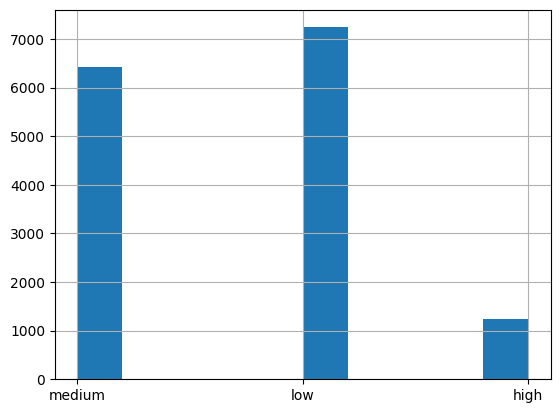

In [12]:
data.salary.hist()

<Axes: >

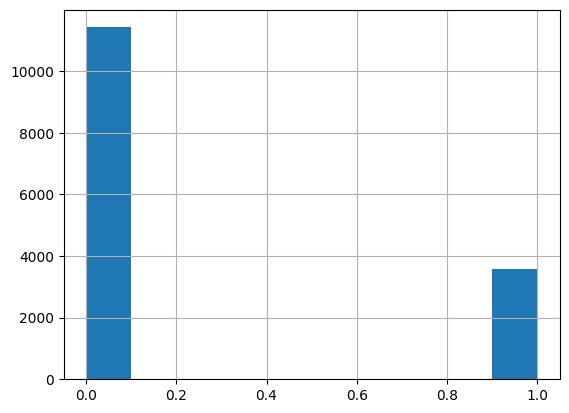

In [13]:
data.left.hist()

# Explore Data

## Data Shape

In [14]:
data.shape # (observasi, kolom)

(14999, 10)

In [15]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'division', 'salary'],
      dtype='object')

## Value Counts and Proportion

In [16]:
data['left']

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [17]:
data['salary'].value_counts()

low       7240
medium    6414
high      1235
Name: salary, dtype: int64

In [18]:
data["left"].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [19]:
data["salary"].value_counts(normalize=True)

low       0.486265
medium    0.430788
high      0.082947
Name: salary, dtype: float64

## Duplicated Data

In [20]:
# check shape
data.shape

(14999, 10)

In [21]:
# Check if there are duplicates
data.duplicated().sum()

2439

In [22]:
data = data.drop_duplicates()

# Missing Data

## Checking Missing Data

In [23]:
data.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,division,salary
0,True,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,True,False,False,False,False,False,False,False,False
14995,False,True,False,False,False,False,False,False,False,False
14996,False,True,False,False,False,False,False,False,False,False
14997,False,True,False,False,False,False,False,False,False,False


In [24]:
data.isnull().sum()

satisfaction_level       228
last_evaluation          128
number_project             0
average_montly_hours       0
time_spend_company         0
Work_accident              0
left                       0
promotion_last_5years      0
division                 105
salary                   110
dtype: int64

## Handling Missing Values
* Drop
* Imputation 

## Dropping Missing Values

In [25]:
data_hr_empty = data.dropna(axis=0)

In [26]:
data_hr_empty.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
division                 0
salary                   0
dtype: int64

In [27]:
data.shape

(12560, 10)

In [28]:
data_hr_empty.shape

(11991, 10)

In [29]:
data.isnull().sum()

satisfaction_level       228
last_evaluation          128
number_project             0
average_montly_hours       0
time_spend_company         0
Work_accident              0
left                       0
promotion_last_5years      0
division                 105
salary                   110
dtype: int64

## Missing Values Imputation

Data imputation adalah proses pengisian data yang memiliki data yang kosong, biasanya diperlihatkan sebagai NaN

Proses tersebut terbagi menjadi 2:
* Numerical Imputation
* Categorical Imputation

<font color='red'>Split data menjadi input-output serta numerical dan categorical sebelum imputation</font>

# Split Input-Output

data = data_input + data_output <br>
data_input = data - data_output

In [30]:
data_output = data["left"] # mengambil kolom output
data_input  = data.drop(["left"], axis=1) # drop kolom output dari data, tersisa input

In [31]:
data_output.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [32]:
# drop kolom tidak berguna
data_input.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,division,salary
0,NaN,0.53,2,157,3,0,0,sales,NaN
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,NaN,7,272,4,0,0,NaN,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [33]:
data_input.isnull().sum()

satisfaction_level       228
last_evaluation          128
number_project             0
average_montly_hours       0
time_spend_company         0
Work_accident              0
promotion_last_5years      0
division                 105
salary                   110
dtype: int64

In [34]:
data_input.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,division,salary
0,NaN,0.53,2,157,3,0,0,sales,NaN
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,NaN,7,272,4,0,0,NaN,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


# Split Numeric and Categoric

data_input = data_numerical + data_categorical <br>
data_categorical = data - data_numerical

In [35]:
data_numerical = data_input._get_numeric_data()  # mengambil kolom numerik secara otomatis
data_numerical.head() # cek observasi teratas dari data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,NaN,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,NaN,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


Work_accident, promotion_last_5years memang berbentuk numerical, namun secara nilai bentuknya categorical <br>
Work_accident :: pernah mengalami kecelakaan selama kerja atau tidak <br>
promotion_last_5years :: pernah mendapatkan promosi atau tidak selama 5 tahun terakhir

In [36]:
num_cat = ["Work_accident","promotion_last_5years"]  # kolom categoric dalam bentuk numeric

In [37]:
data_numerical = data_numerical.drop(num_cat, axis=1)  # drop num_cat dari data_numerical
data_numerical.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,NaN,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,NaN,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [38]:
data_numerical.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company'],
      dtype='object')

In [39]:
numerical = data_numerical.columns # kolom numerik

data_categorical = data - data_numeric

In [40]:
data_categorical = data_input.drop(numerical, axis=1) # drop kolom numerik, tersisa kolom kategorik
data_categorical.head()

,Work_accident,promotion_last_5years,division,salary
0,0,0,sales,NaN
1,0,0,sales,medium
2,0,0,NaN,medium
3,0,0,sales,low
4,0,0,sales,low


In [41]:
categorical = data_categorical.columns

# Missing Values Imputation

## Missing Values Imputation: Numerical 

In [42]:
# import library untuk imputation
from sklearn.impute import SimpleImputer

In [43]:
# imputation menggunakan nilai median 
imput = SimpleImputer(missing_values= np.nan, strategy='median')

In [44]:
data_numerical

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,NaN,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,NaN,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
14994,0.40,NaN,2,151,3
14995,0.37,NaN,2,160,3
14996,0.37,NaN,2,143,3
14997,0.11,NaN,6,280,4


In [45]:
data_numerical.isnull().sum()

satisfaction_level      228
last_evaluation         128
number_project            0
average_montly_hours      0
time_spend_company        0
dtype: int64

In [46]:
# fitting imputer ke data untuk menyimpan nilai median tiap kolom
imput.fit(data_numerical) 

SimpleImputer(strategy='median')

## Imputation Process

In [47]:
# Imputasi kolom numerik
imput.transform(data_numerical)

array([[6.60e-01, 5.30e-01, 2.00e+00, 1.57e+02, 3.00e+00],
       [8.00e-01, 8.60e-01, 5.00e+00, 2.62e+02, 6.00e+00],
       [1.10e-01, 7.20e-01, 7.00e+00, 2.72e+02, 4.00e+00],
       ...,
       [3.70e-01, 7.20e-01, 2.00e+00, 1.43e+02, 3.00e+00],
       [1.10e-01, 7.20e-01, 6.00e+00, 2.80e+02, 4.00e+00],
       [3.70e-01, 7.20e-01, 2.00e+00, 1.58e+02, 3.00e+00]])

In [48]:
data_numerical_imputed = pd.DataFrame(imput.transform(data_numerical)) # Membuat ke dalam bentuk DataFrame
data_numerical_imputed.head()

,0,1,2,3,4
0,0.66,0.53,2.0,157.0,3.0
1,0.80,0.86,5.0,262.0,6.0
2,0.11,0.72,7.0,272.0,4.0
3,0.72,0.87,5.0,223.0,5.0
4,0.37,0.52,2.0,159.0,3.0


In [49]:
# memperbaiki column dan index yang hilang
data_numerical_imputed.columns = data_numerical.columns
data_numerical_imputed.index   = data_numerical.index
data_numerical_imputed.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.66,0.53,2.0,157.0,3.0
1,0.80,0.86,5.0,262.0,6.0
2,0.11,0.72,7.0,272.0,4.0
3,0.72,0.87,5.0,223.0,5.0
4,0.37,0.52,2.0,159.0,3.0


In [50]:
data_numerical_imputed.isnull().sum()

satisfaction_level      0
last_evaluation         0
number_project          0
average_montly_hours    0
time_spend_company      0
dtype: int64

In [51]:
data_numerical.isnull().sum()

satisfaction_level      228
last_evaluation         128
number_project            0
average_montly_hours      0
time_spend_company        0
dtype: int64

# Tugas Missing Value: Numerical .fillna

In [52]:
data_numerical

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,NaN,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,NaN,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
14994,0.40,NaN,2,151,3
14995,0.37,NaN,2,160,3
14996,0.37,NaN,2,143,3
14997,0.11,NaN,6,280,4


In [53]:
data_numerical.isnull().sum()

satisfaction_level      228
last_evaluation         128
number_project            0
average_montly_hours      0
time_spend_company        0
dtype: int64

In [54]:
#data_numerical['satisfaction_level'] = data_numerical['satisfaction_level'].fillna(data_numerical['satisfaction_level'].mean())

In [55]:
#data_numerical['last_evaluation'] = data_numerical['last_evaluation'].fillna(data_numerical['last_evaluation'].mean())

In [56]:
data_numerical

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,NaN,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,NaN,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
14994,0.40,NaN,2,151,3
14995,0.37,NaN,2,160,3
14996,0.37,NaN,2,143,3
14997,0.11,NaN,6,280,4


In [57]:
data_numerical.isnull().sum()

satisfaction_level      228
last_evaluation         128
number_project            0
average_montly_hours      0
time_spend_company        0
dtype: int64

## Missing Value: Categorical

In [58]:
# Cek data kosong pada data_categorical 
data_categorical.isnull().sum()

Work_accident              0
promotion_last_5years      0
division                 105
salary                   110
dtype: int64

In [59]:
data_categorical.mode()

,Work_accident,promotion_last_5years,division,salary
0,0,0,sales,low


In [60]:
data_categorical.columns

Index(['Work_accident', 'promotion_last_5years', 'division', 'salary'], dtype='object')

In [61]:
values = {'Work_accident' : 0, 'promotion_last_5years' : 0, 'division' : 'sales', 'salary' : 'medium'}

In [62]:
data_categorical.fillna(value= values)

,Work_accident,promotion_last_5years,division,salary
0,0,0,sales,medium
1,0,0,sales,medium
2,0,0,sales,medium
3,0,0,sales,low
4,0,0,sales,low
...,...,...,...,...
14994,0,0,support,low
14995,0,0,support,low
14996,0,0,support,low
14997,0,0,support,low


In [63]:
data_categorical.isnull().sum()

Work_accident              0
promotion_last_5years      0
division                 105
salary                   110
dtype: int64

In [64]:
data_categorical_imputed2 = data_categorical.fillna(value= values)

In [65]:
data_categorical_imputed2.head()

,Work_accident,promotion_last_5years,division,salary
0,0,0,sales,medium
1,0,0,sales,medium
2,0,0,sales,medium
3,0,0,sales,low
4,0,0,sales,low


In [66]:
data_categorical_imputed2.isnull().sum()

Work_accident            0
promotion_last_5years    0
division                 0
salary                   0
dtype: int64

In [67]:
data_categorical_imputed = data_categorical.fillna("KOSONG") # mengisi data kosong dengan nilai KOSONG
data_categorical_imputed.head()

,Work_accident,promotion_last_5years,division,salary
0,0,0,sales,KOSONG
1,0,0,sales,medium
2,0,0,KOSONG,medium
3,0,0,sales,low
4,0,0,sales,low


In [68]:
data_categorical_imputed.isnull().sum()

Work_accident            0
promotion_last_5years    0
division                 0
salary                   0
dtype: int64

In [69]:
# menggabungkan data_numerical dan data_categorical yang sudah diimputasi
data_input_clean = pd.concat([data_numerical_imputed, data_categorical_imputed], axis = 1)
data_input_clean.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,division,salary
0,0.66,0.53,2.0,157.0,3.0,0,0,sales,KOSONG
1,0.80,0.86,5.0,262.0,6.0,0,0,sales,medium
2,0.11,0.72,7.0,272.0,4.0,0,0,KOSONG,medium
3,0.72,0.87,5.0,223.0,5.0,0,0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0,0,sales,low


In [70]:
# menggabungkan data_input yang sudah bersih dengan data output
data_clean = pd.concat([data_input_clean, data_output], axis=1)
data_clean.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,division,salary,left
0,0.66,0.53,2.0,157.0,3.0,0,0,sales,KOSONG,1
1,0.80,0.86,5.0,262.0,6.0,0,0,sales,medium,1
2,0.11,0.72,7.0,272.0,4.0,0,0,KOSONG,medium,1
3,0.72,0.87,5.0,223.0,5.0,0,0,sales,low,1
4,0.37,0.52,2.0,159.0,3.0,0,0,sales,low,1


In [71]:
# save to csv
data_clean.to_csv("hr_data_clean.csv")